In [22]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)         

#abandoned_release_history = pd.read_csv('abandoned_release_history.csv')
active_release_history = pd.read_csv('active_release_history.csv')

In [23]:
active_release_history

,artifact_id,release_id,release_version,release_timestamp,release_year,creation_year,label,time_gap
0,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,2015,2015,Active,NaN
1,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,2015,2015,Active,1 days 19:54:58
2,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,2016,2015,Dormant,366 days 13:44:51
3,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2023,2015,Dormant,2457 days 11:18:50
4,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,2023,2015,Active,0 days 00:48:34
...,...,...,...,...,...,...,...,...
10229182,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,2017,2015,Active,205 days 08:47:45
10229183,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,2020,2015,Dormant,1051 days 06:53:29
10229184,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,2022,2015,Dormant,664 days 18:10:41
10229185,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,2022,2015,Active,22 days 18:19:24


In [24]:
active_release_history.dtypes

artifact_id          object
release_id           object
release_version      object
release_timestamp    object
release_year          int64
creation_year         int64
label                object
time_gap             object
dtype: object

In [25]:


# Convert release_timestamp to datetime for accurate sorting
active_release_history['release_timestamp'] = pd.to_datetime(active_release_history['release_timestamp'])
# Simplified approach to rename the label of the very last release of each artifact

#
last_release_idx = active_release_history.groupby('artifact_id')['release_timestamp'].idxmax()

# Rename the label of the very last release to 'Active_again' for all projects
active_release_history.loc[last_release_idx, 'label'] = 'Active_again'
active_release_history

,artifact_id,release_id,release_version,release_timestamp,release_year,creation_year,label,time_gap
0,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,2015,2015,Active,NaN
1,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,2015,2015,Active,1 days 19:54:58
2,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,2016,2015,Dormant,366 days 13:44:51
3,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2023,2015,Dormant,2457 days 11:18:50
4,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,2023,2015,Active,0 days 00:48:34
...,...,...,...,...,...,...,...,...
10229182,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,2017,2015,Active,205 days 08:47:45
10229183,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,2020,2015,Dormant,1051 days 06:53:29
10229184,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,2022,2015,Dormant,664 days 18:10:41
10229185,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,2022,2015,Active,22 days 18:19:24


In [26]:
active_release_history['artifact_id'].nunique()

196280

In [27]:
active_release_history['label'].value_counts()

label
Active          9985012
Active_again     196280
Dormant           47895
Name: count, dtype: int64

In [28]:
# active_release_history['release_timestamp'] = pd.to_datetime(active_release_history['release_timestamp'], errors='coerce')
# active_release_history

In [29]:
import pandas as pd

# Function to capture the full sequence of states with time intervals for each project
def capture_full_sequence(df):
    # Sort data by artifact_id and release_timestamp for each project
    df = df.sort_values(by=['artifact_id', 'release_timestamp'])
    
    # Initialize a list to store the full sequence data
    sequence_data = []
    
    # Iterate over each project (grouped by artifact_id)
    for artifact_id, group in df.groupby('artifact_id'):
        project_sequence = []
        prev_timestamp = None  # Track the previous timestamp for calculating intervals
        
        # Iterate over each release for the project
        for _, row in group.iterrows():
            current_state = row['label']
            current_timestamp = row['release_timestamp']
            
            # Calculate the time interval from the previous state if it exists
            if prev_timestamp is not None:
                time_interval = current_timestamp - prev_timestamp
            else:
                time_interval = None  # The first state has no previous time interval
            
            # Append the current state and its time interval to the sequence
            project_sequence.append({
                'state': current_state,
                'time_interval': time_interval
            })
            
            # Update the previous timestamp to the current one
            prev_timestamp = current_timestamp
        
        # Append the entire sequence for the current project to the results
        sequence_data.append({
            'artifact_id': artifact_id,
            'full_sequence': project_sequence
        })
    
    # Convert the results into a DataFrame
    return pd.DataFrame(sequence_data)

# Apply the function to capture the full sequence for each project in abandoned_release_history
active_full_sequence = capture_full_sequence(active_release_history)

# Display the first few rows of the result
active_full_sequence.head()


,artifact_id,full_sequence
0,aero.m-click:mcpdf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 1 days 19:54:58}, {'state': 'Dormant', 'time_interval': 366 days 13:44:51}, {'state': 'Dormant', 'time_interval': 2457 days 11:18:50}, {'state': 'Active', 'time_interval': 0 days 00:48:34}, {'state': 'Active', 'time_interval': 0 days 00:13:27}, {'state': 'Active', 'time_interval': 2 days 01:28:58}, {'state': 'Active', 'time_interval': 0 days 00:39:41}, {'state': 'Active_again', 'time_interval': 0 days 00:20:52}]"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:13}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:27}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:15}, {'state': 'Active', 'time_interval': 5 days 03:25:18}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:17}, {'state': 'Active_again', 'time_interval': 12 days 15:30:10}]"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:12}]"


In [30]:
active_full_sequence

,artifact_id,full_sequence
0,aero.m-click:mcpdf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 1 days 19:54:58}, {'state': 'Dormant', 'time_interval': 366 days 13:44:51}, {'state': 'Dormant', 'time_interval': 2457 days 11:18:50}, {'state': 'Active', 'time_interval': 0 days 00:48:34}, {'state': 'Active', 'time_interval': 0 days 00:13:27}, {'state': 'Active', 'time_interval': 2 days 01:28:58}, {'state': 'Active', 'time_interval': 0 days 00:39:41}, {'state': 'Active_again', 'time_interval': 0 days 00:20:52}]"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:13}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:27}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:15}, {'state': 'Active', 'time_interval': 5 days 03:25:18}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:17}, {'state': 'Active_again', 'time_interval': 12 days 15:30:10}]"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:12}]"
...,...,...
196275,zone.src.sheaf:java-sheaf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 77 days 01:18:29}, {'state': 'Active', 'time_interval': 303 days 00:03:41}, {'state': 'Active', 'time_interval': 70 days 17:24:42}, {'state': 'Active', 'time_interval': 35 days 01:35:21}, {'state': 'Active', 'time_interval': 119 days 01:18:30}, {'state': 'Active', 'time_interval': 0 days 04:31:05}, {'state': 'Active', 'time_interval': 7 days 02:02:37}, {'state': 'Active', 'time_interval': 0 days 00:05:27}, {'state': 'Active', 'time_interval': 91 days 20:21:56}, {'state': 'Active', 'time_interval': 0 days 00:15:32}, {'state': 'Active', 'time_interval': 40 days 03:06:05}, {'state': 'Active', 'time_interval': 91 days 16:54:05}, {'state': 'Active', 'time_interval': 219 days 07:11:34}, {'state': 'Dormant', 'time_interval': 1051 days 06:26:37}, {'state': 'Dormant', 'time_interval': 664 days 18:41:14}, {'state': 'Active_again', 'time_interval': 360 days 19:13:56}]"
196276,zone.src.sheaf:logback-sheaf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 5 days 11:47:41}, {'state': 'Active', 'time_interval': 358 days 22:42:01}, {'state': 'Active', 'time_interval': 30 days 11:28:10}, {'state': 'Active', 'time_interval': 293 days 09:22:17}, {'state': 'Active', 'time_interval': 81 days 18:54:42}, {'state': 'Active', 'time_interval': 228 days 00:38:40}, {'state': 'Dormant', 'time_interval': 1716 days 23:57:38}, {'state': 'Active', 'time_interval': 360 days 23:08:53}, {'state': 'Active', 'time_interval': 0 days 00:18:10}, {'state': 'Active_again', 'time_interval': 0 days 00:20:18}]"
196277,zone.src.sheaf:sheaf-deps-bom,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 221 days 03:58:18}, {'state': 'Dormant', 'time_interval': 1051 days 06:26:45}, {'state': 'Dormant', 'time_interval': 664 days 17:58:11}, {'state': 'Active_again

In [31]:

# Function to simplify the sequence and consolidate redundant states
def simplify_sequence(full_sequence):
    simplified_sequence = []
    current_state = None
    accumulated_time = pd.Timedelta(0)
    
    for item in full_sequence:
        state = item['state']
        time_interval = item['time_interval']
        
        if state != current_state:
            # If we're switching to a new state, append the previous state and its accumulated time
            if current_state is not None:
                simplified_sequence.append({'state': current_state, 'time_interval': accumulated_time})
            
            # Reset for the new state
            current_state = state
            accumulated_time = time_interval if time_interval is not None else pd.Timedelta(0)
        else:
            # If it's the same state, accumulate the time interval
            if time_interval is not None:
                accumulated_time += time_interval
    
    # Append the last accumulated state and time
    if current_state is not None:
        simplified_sequence.append({'state': current_state, 'time_interval': accumulated_time})
    
    return simplified_sequence

# Apply the simplification function to each project's full sequence in the DataFrame
active_full_sequence['simplified_sequence'] = active_full_sequence['full_sequence'].apply(simplify_sequence)

# Display the first few rows of the result
active_full_sequence[['artifact_id', 'simplified_sequence']].head()


,artifact_id,simplified_sequence
0,aero.m-click:mcpdf,"[{'state': 'Active', 'time_interval': 1 days 19:54:58}, {'state': 'Dormant', 'time_interval': 2824 days 01:03:41}, {'state': 'Active', 'time_interval': 2 days 03:10:40}, {'state': 'Active_again', 'time_interval': 0 days 00:20:52}]"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,"[{'state': 'Active', 'time_interval': 232 days 01:48:17}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,"[{'state': 'Active', 'time_interval': 232 days 01:48:16}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,"[{'state': 'Active', 'time_interval': 232 days 01:48:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:10}]"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,"[{'state': 'Active', 'time_interval': 232 days 01:48:16}, {'state': 'Active_again', 'time_interval': 12 days 15:30:12}]"


In [32]:
active_full_sequence

,artifact_id,full_sequence,simplified_sequence
0,aero.m-click:mcpdf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 1 days 19:54:58}, {'state': 'Dormant', 'time_interval': 366 days 13:44:51}, {'state': 'Dormant', 'time_interval': 2457 days 11:18:50}, {'state': 'Active', 'time_interval': 0 days 00:48:34}, {'state': 'Active', 'time_interval': 0 days 00:13:27}, {'state': 'Active', 'time_interval': 2 days 01:28:58}, {'state': 'Active', 'time_interval': 0 days 00:39:41}, {'state': 'Active_again', 'time_interval': 0 days 00:20:52}]","[{'state': 'Active', 'time_interval': 1 days 19:54:58}, {'state': 'Dormant', 'time_interval': 2824 days 01:03:41}, {'state': 'Active', 'time_interval': 2 days 03:10:40}, {'state': 'Active_again', 'time_interval': 0 days 00:20:52}]"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:13}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:27}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]","[{'state': 'Active', 'time_interval': 232 days 01:48:17}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]","[{'state': 'Active', 'time_interval': 232 days 01:48:16}, {'state': 'Active_again', 'time_interval': 12 days 15:30:11}]"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:15}, {'state': 'Active', 'time_interval': 5 days 03:25:18}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:17}, {'state': 'Active_again', 'time_interval': 12 days 15:30:10}]","[{'state': 'Active', 'time_interval': 232 days 01:48:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:10}]"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 12 days 18:58:11}, {'state': 'Active', 'time_interval': 5 days 03:25:19}, {'state': 'Active', 'time_interval': 82 days 07:12:28}, {'state': 'Active', 'time_interval': 131 days 20:12:18}, {'state': 'Active_again', 'time_interval': 12 days 15:30:12}]","[{'state': 'Active', 'time_interval': 232 days 01:48:16}, {'state': 'Active_again', 'time_interval': 12 days 15:30:12}]"
...,...,...,...
196275,zone.src.sheaf:java-sheaf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Active', 'time_interval': 77 days 01:18:29}, {'state': 'Active', 'time_interval': 303 days 00:03:41}, {'state': 'Active', 'time_interval': 70 days 17:24:42}, {'state': 'Active', 'time_interval': 35 days 01:35:21}, {'state': 'Active', 'time_interval': 119 days 01:18:30}, {'state': 'Active', 'time_interval': 0 days 04:31:05}, {'state': 'Active', 'time_interval': 7 days 02:02:37}, {'state': 'Active', 'time_interval': 0 days 00:05:27}, {'state': 'Active', 'time_interval': 91 days 20:21:56}, {'state': 'Active', 'time_interval': 0 days 00:15:32}, {'state': 'Active', 'time_interval': 40 days 03:06:05}, {'state': 'Active', 'time_interval': 91 days 16:54:05}, {'state': 'Active', 'time_interval': 219 days 07:11:34}, {'state': 'Dormant', 'time_interval': 1051 days 06:26:37}, {'state': 'Dormant', 'time_interval': 664 days 18:41:14}, {'state': 'Active_again', 'time_interval': 360 days 19:13:56}]","[{'state': 'Active', 'time_interval': 1055 days 04:09:04}, {'state': 'Dormant', 'time_interval': 1716 days 01:07:51}, {'state': 'Active_again', 'time_interval': 360 days 19:13:56}]"
19627

In [33]:
active_full_sequence.to_csv('active_full_sequence.csv', index=False)

In [ ]:
# Specify the artifact_id of the project you want to inspect
artifact_id_to_inspect = 'zone.src.sheaf:web-sheaf'

# Filter the abandoned_release_history DataFrame for the specified artifact_id
test = active_full_sequence[active_full_sequence['artifact_id'] == artifact_id_to_inspect]

# Sort by release timestamp to view in chronological order
# test = test.sort_values(by='release_timestamp').reset_index(drop=True)

test

,artifact_id,full_sequence,simplified_sequence
196279,zone.src.sheaf:web-sheaf,"[{'state': 'Active', 'time_interval': None}, {'state': 'Dormant', 'time_interval': 379 days 22:22:15}, {'state': 'Active', 'time_interval': 70 days 17:12:55}, {'state': 'Active', 'time_interval': 14 days 03:14:25}, {'state': 'Active', 'time_interval': 0 days 00:43:23}, {'state': 'Active', 'time_interval': 20 days 21:50:36}, {'state': 'Active', 'time_interval': 61 days 04:13:13}, {'state': 'Active', 'time_interval': 57 days 21:05:28}, {'state': 'Active', 'time_interval': 7 days 06:27:23}, {'state': 'Active', 'time_interval': 76 days 18:53:50}, {'state': 'Active', 'time_interval': 15 days 01:30:39}, {'state': 'Active', 'time_interval': 11 days 09:10:02}, {'state': 'Active', 'time_interval': 5 days 13:35:24}, {'state': 'Active', 'time_interval': 2 days 05:37:35}, {'state': 'Active', 'time_interval': 20 days 23:06:34}, {'state': 'Active', 'time_interval': 6 days 02:03:47}, {'state': 'Active', 'time_interval': 85 days 14:54:08}, {'state': 'Active', 'time_interval': 13 days 22:20:27}, {'state': 'Active', 'time_interval': 205 days 08:47:45}, {'state': 'Dormant', 'time_interval': 1051 days 06:53:29}, {'state': 'Dormant', 'time_interval': 664 days 18:10:41}, {'state': 'Active', 'time_interval': 22 days 18:19:24}, {'state': 'Active_again', 'time_interval': 338 days 00:48:32}]","[{'state': 'Active', 'time_interval': 0 days 00:00:00}, {'state': 'Dormant', 'time_interval': 379 days 22:22:15}, {'state': 'Active', 'time_interval': 675 days 02:47:34}, {'state': 'Dormant', 'time_interval': 1716 days 01:04:10}, {'state': 'Active', 'time_interval': 22 days 18:19:24}, {'state': 'Active_again', 'time_interval': 338 days 00:48:32}]"


In [ ]:
from collections import Counter

# Assuming 'active_full_sequence' DataFrame has a 'simplified_sequence' column

# Step 1: Extract all transitions from the simplified sequences
transitions = []

for _, row in active_full_sequence.iterrows():
    sequence = row['simplified_sequence']
    
    # Capture consecutive transitions within the sequence
    for i in range(1, len(sequence)):
        from_state = sequence[i - 1]['state']
        to_state = sequence[i]['state']
        
        # Append each transition as a tuple
        transitions.append((from_state, to_state))

# Step 2: Count the occurrences of each transition
transition_counts = Counter(transitions)

# Step 3: Calculate total transitions from each state
total_transitions_from_state = Counter([from_state for from_state, _ in transitions])

# Step 4: Calculate transition probabilities
transition_probabilities = {}

for (from_state, to_state), count in transition_counts.items():
    # Calculate the probability of transition from 'from_state' to 'to_state'
    probability = (count / total_transitions_from_state[from_state]) * 100  # Convert to percentage
    transition_probabilities[(from_state, to_state)] = round(probability, 2)

# Step 5: Convert the results into a DataFrame for easy viewing
transition_df = pd.DataFrame(
    [(from_state, to_state, prob) for (from_state, to_state), prob in transition_probabilities.items()],
    columns=['From State', 'To State', 'Transition Probability (%)']
)

# Sort for better readability
transition_df.sort_values(by=['From State', 'To State'], inplace=True)
transition_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
transition_df


,From State,To State,Transition Probability (%)
0,Active,Active_again,81.35
1,Active,Dormant,18.65
2,Active_again,Active,100.00
3,Dormant,Active,73.06
4,Dormant,Active_again,26.94


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
states = set(transition_df['From State']).union(set(transition_df['To State']))
G.add_nodes_from(states)

# Step 2: Add edges with probabilities as labels
for _, row in transition_df.iterrows():
    from_state = row['From State']
    to_state = row['To State']
    probability = row['Transition Probability (%)']
    
    # Add an edge with a label showing the transition probability
    G.add_edge(from_state, to_state, label=f"{probability}%")

# Step 3: Plot the graph
plt.figure(figsize=(10, 8))

# Define positions for the nodes to make the graph visually similar to the reference image
pos = {
    "Active": (0, 1),
    "Dormant": (1, 0),
    "Abandoned": (2, 1),
    "Non-coding": (1, 2),
    "Gone": (1.5, 0.5)  # Adjust positions as needed to match your states
}

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)

# Draw edge labels with transition probabilities
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.title("Aggregated Transition Probabilities")
plt.show()


NameError: name 'transition_df' is not defined

In [ ]:
import pandas as pd
from collections import Counter

# Assuming 'active_full_sequence' DataFrame has a 'simplified_sequence' column

# Step 1: Extract all transitions from the simplified sequences
transitions = []

for _, row in active_full_sequence.iterrows():
    sequence = row['full_sequence']
    
    # Capture consecutive transitions within the sequence
    for i in range(1, len(sequence)):
        from_state = sequence[i - 1]['state']
        to_state = sequence[i]['state']
        
        # Append each transition as a tuple
        transitions.append((from_state, to_state))

# Step 2: Count the occurrences of each transition
transition_counts = Counter(transitions)

# Step 3: Calculate total transitions from each state
total_transitions_from_state = Counter([from_state for from_state, _ in transitions])

# Step 4: Calculate transition probabilities
transition_probabilities = {}

for (from_state, to_state), count in transition_counts.items():
    # Calculate the probability of transition from 'from_state' to 'to_state'
    probability = (count / total_transitions_from_state[from_state]) * 100  # Convert to percentage
    transition_probabilities[(from_state, to_state)] = round(probability, 2)

# Step 5: Convert the results into a DataFrame for easy viewing
transition_df = pd.DataFrame(
    [(from_state, to_state, prob) for (from_state, to_state), prob in transition_probabilities.items()],
    columns=['From State', 'To State', 'Transition Probability (%)']
)

# Sort for better readability
transition_df.sort_values(by=['From State', 'To State'], inplace=True)
transition_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
transition_df


,From State,To State,Transition Probability (%)
0,Active,Active,97.72
1,Active,Active_again,1.85
2,Active,Dormant,0.42
3,Active_again,Active,100.00
4,Dormant,Active,64.64
5,Dormant,Active_again,23.84
6,Dormant,Dormant,11.53


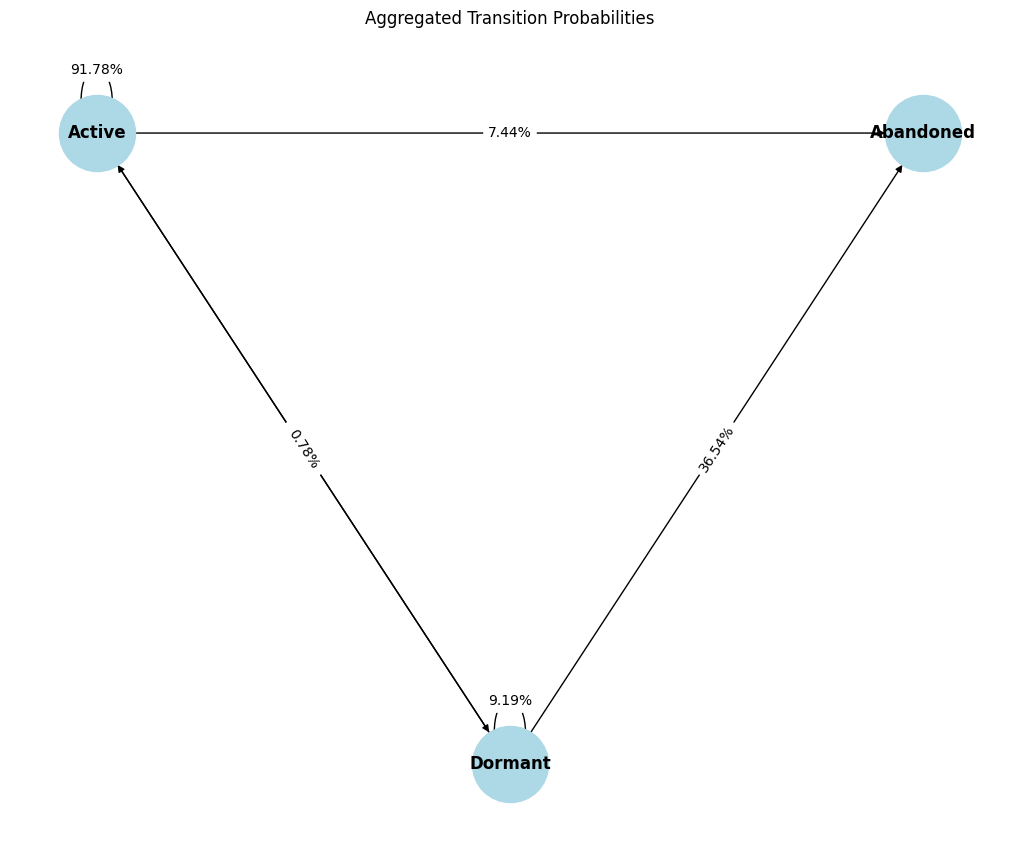

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
states = set(transition_df['From State']).union(set(transition_df['To State']))
G.add_nodes_from(states)

# Step 2: Add edges with probabilities as labels
for _, row in transition_df.iterrows():
    from_state = row['From State']
    to_state = row['To State']
    probability = row['Transition Probability (%)']
    
    # Add an edge with a label showing the transition probability
    G.add_edge(from_state, to_state, label=f"{probability}%")

# Step 3: Plot the graph
plt.figure(figsize=(10, 8))

# Define positions for the nodes to make the graph visually similar to the reference image
pos = {
    "Active": (0, 1),
    "Dormant": (1, 0),
    "Abandoned": (2, 1),
    "Non-coding": (1, 2),
    "Gone": (1.5, 0.5)  # Adjust positions as needed to match your states
}

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)

# Draw edge labels with transition probabilities
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.title("Aggregated Transition Probabilities")
plt.show()


In [ ]:
# import pandas as pd
# from collections import Counter, defaultdict

# # Sample DataFrame: 'active_full_sequence' with 'simplified_sequence' column

# # Step 1: Extract transitions and their time intervals from the simplified sequences
# transitions = []
# time_intervals = defaultdict(list)  # To store time intervals (in days) for each transition type

# for _, row in active_full_sequence.iterrows():
#     sequence = row['full_sequence']
    
#     for i in range(1, len(sequence)):
#         from_state = sequence[i - 1]['state']
#         to_state = sequence[i]['state']
#         time_interval = sequence[i - 1]['time_interval']
        
#         # Store the transition and time interval in days (avoiding OverflowError with Timedelta)
#         transitions.append((from_state, to_state))
#         if time_interval is not None:
#             time_intervals[(from_state, to_state)].append(time_interval / pd.Timedelta(days=1))  # Convert to days

# # Step 2: Calculate transition counts and probabilities
# transition_counts = Counter(transitions)
# total_transitions_from_state = Counter([t[0] for t in transitions])
# transition_probabilities = {}

# for (from_state, to_state), count in transition_counts.items():
#     probability = (count / total_transitions_from_state[from_state]) * 100
#     transition_probabilities[(from_state, to_state)] = round(probability, 2)

# # Step 3: Calculate average time intervals (in days) for each transition
# average_time_intervals = {}
# for transition, intervals in time_intervals.items():
#     avg_time = sum(intervals) / len(intervals) if intervals else 0  # Average time in days
#     average_time_intervals[transition] = round(avg_time, 2)

# # Step 4: Create DataFrame for transition probabilities and average time intervals
# results = []
# for (from_state, to_state), probability in transition_probabilities.items():
#     avg_time = average_time_intervals.get((from_state, to_state), "N/A")
#     results.append({
#         "From State": from_state,
#         "To State": to_state,
#         "Transition Probability (%)": probability,
#         "Average Time Interval (days)": avg_time
#     })

# # Convert results to DataFrame
# transition_df = pd.DataFrame(results)

# # Display the DataFrame
# transition_df.sort_values(by=['From State', 'To State'], inplace=True)
# transition_df.reset_index(drop=True, inplace=True)
# transition_df 




,From State,To State,Transition Probability (%),Average Time Interval (days)
0,Active,Active,97.72,16.36
1,Active,Active_again,1.85,64.44
2,Active,Dormant,0.42,101.38
3,Active_again,Active,100.00,71.01
4,Dormant,Active,64.64,605.09
5,Dormant,Active_again,23.84,717.04
6,Dormant,Dormant,11.53,608.52


In [ ]:
import pandas as pd
from collections import Counter, defaultdict

# Sample DataFrame: 'active_full_sequence' with 'simplified_sequence' column

# Step 1: Extract transitions and their time intervals from the simplified sequences
transitions = []
time_intervals = defaultdict(list)  # To store time intervals (in days) for each transition type

for _, row in active_full_sequence.iterrows():
    sequence = row['full_sequence']
    
    for i in range(1, len(sequence)):
        from_state = sequence[i - 1]['state']
        to_state = sequence[i]['state']
        
        # Stop processing if from_state is 'Active_again', as it is a terminal state
        if from_state == 'Active_again':
            break
        
        time_interval = sequence[i - 1]['time_interval']
        
        # Store the transition and time interval in days (avoiding OverflowError with Timedelta)
        transitions.append((from_state, to_state))
        if time_interval is not None:
            time_intervals[(from_state, to_state)].append(time_interval / pd.Timedelta(days=1))  # Convert to days

# Step 2: Calculate transition counts and probabilities
transition_counts = Counter(transitions)
total_transitions_from_state = Counter([t[0] for t in transitions])
transition_probabilities = {}

for (from_state, to_state), count in transition_counts.items():
    probability = (count / total_transitions_from_state[from_state]) * 100
    transition_probabilities[(from_state, to_state)] = round(probability, 2)

# Step 3: Calculate average time intervals (in days) for each transition
average_time_intervals = {}
for transition, intervals in time_intervals.items():
    avg_time = sum(intervals) / len(intervals) if intervals else 0  # Average time in days
    average_time_intervals[transition] = round(avg_time, 2)

# Step 4: Create DataFrame for transition probabilities and average time intervals
results = []
for (from_state, to_state), probability in transition_probabilities.items():
    avg_time = average_time_intervals.get((from_state, to_state), "N/A")
    results.append({
        "From State": from_state,
        "To State": to_state,
        "Transition Probability (%)": probability,
        "Average Time Interval (days)": avg_time
    })

# Convert results to DataFrame
transition_df = pd.DataFrame(results)

# Display the DataFrame
transition_df.sort_values(by=['From State', 'To State'], inplace=True)
transition_df.reset_index(drop=True, inplace=True)
transition_df 


,From State,To State,Transition Probability (%),Average Time Interval (days)
0,Active,Active,97.72,16.36
1,Active,Active_again,1.85,64.44
2,Active,Dormant,0.42,101.38
3,Dormant,Active,64.64,605.09
4,Dormant,Active_again,23.84,717.04
5,Dormant,Dormant,11.53,608.52


In [ ]:
from itertools import islice
import numpy as np

# Calculate total time spent in each state
state_durations = defaultdict(list)

for _, row in active_full_sequence.iterrows():
    sequence = row['full_sequence']  # Use full sequence for a detailed view
    for entry in sequence:
        state = entry['state']
        time_interval = entry['time_interval']
        if time_interval is not None:
            state_durations[state].append(time_interval / pd.Timedelta(days=1))  # Convert to days

# Average duration for each state
state_duration_df = pd.DataFrame(
    [(state, np.mean(durations)) for state, durations in state_durations.items()],
    columns=["State", "Average Duration (days)"]
)
state_duration_df


,State,Average Duration (days)
0,Active,23.363306
1,Abandoned,127.009361
2,Dormant,615.227995


In [ ]:
from itertools import islice
import numpy as np

# Helper function to generate sequences of length n
def get_n_length_sequences(sequence, n=5):
    return [tuple(sequence[i:i + n]) for i in range(len(sequence) - n + 1)]

# Collect sequences and durations
sequence_durations = defaultdict(list)

for _, row in active_full_sequence.iterrows():
    sequence = row['full_sequence']
    states = [entry['state'] for entry in sequence]
    intervals = [entry['time_interval'] / pd.Timedelta(days=1) if entry['time_interval'] else 0 for entry in sequence]
    
    # Generate 3-state sequences with total duration for each
    for seq in get_n_length_sequences(states, n=3):
        seq_duration = sum(islice(intervals, states.index(seq[0]), states.index(seq[-1]) + 1))
        sequence_durations[seq].append(seq_duration)

# Average duration for each sequence pattern
pattern_duration_df = pd.DataFrame(
    [(pattern, len(durations), np.mean(durations)) for pattern, durations in sequence_durations.items()],
    columns=["Transition Pattern", "Frequency", "Average Duration (days)"]
).sort_values(by="Frequency", ascending=False)
pattern_duration_df


,Transition Pattern,Frequency,Average Duration (days)
4,"(Active, Active, Active)",9557756,0.000000
5,"(Active, Active, Active_again)",167672,1161.756475
0,"(Active, Active, Dormant)",32267,1114.925960
6,"(Active, Dormant, Active)",27830,0.000000
3,"(Dormant, Active, Active)",22375,0.000000
10,"(Active, Dormant, Active_again)",9632,1665.612166
9,"(Dormant, Active, Active_again)",5819,1326.616025
1,"(Active, Dormant, Dormant)",4913,962.742147
2,"(Dormant, Dormant, Active)",3128,0.000000
11,"(Dormant, Active, Dormant)",2764,605.185832


In [ ]:
import pandas as pd

# List to store results with details
increasing_intervals_data = []

for _, row in active_full_sequence.iterrows():
    project_id = row['artifact_id']
    project_name = row['artifact_id']  # Assuming 'project_name' column exists
    sequence = row['full_sequence']
    active_intervals = []

    # Extract only Active → Active intervals
    for i in range(1, len(sequence)):
        if sequence[i - 1]['state'] == 'Active' and sequence[i]['state'] == 'Active':
            time_interval = sequence[i - 1]['time_interval'] / pd.Timedelta(days=1)  # in days
            active_intervals.append(time_interval)

    # Check if intervals show an increasing trend
    if len(active_intervals) > 1:
        increasing_trend = all(x < y for x, y in zip(active_intervals, active_intervals[1:]))
        if increasing_trend:
            increasing_intervals_data.append({
                'project_id': project_id,
                'project_name': project_name,
                'intervals': active_intervals,
                'num_intervals': len(active_intervals),
                'average_interval': sum(active_intervals) / len(active_intervals)
            })

# Convert to DataFrame
increasing_intervals_df = pd.DataFrame(increasing_intervals_data)
print("Projects with increasing Active intervals:")
increasing_intervals_df

Projects with increasing Active intervals:


,project_id,project_name,intervals,num_intervals,average_interval
0,be.doeraene:url-dsl_3,be.doeraene:url-dsl_3,"[1.519988425925926, 74.14453703703704, 76.08998842592592]",3,50.584838
1,be.doeraene:url-dsl_sjs1_3,be.doeraene:url-dsl_sjs1_3,"[74.14456018518518, 76.08997685185186]",2,75.117269
2,ca.nexapp:nexapp-kore,ca.nexapp:nexapp-kore,"[0.5815393518518519, 38.13824074074074, 153.2437962962963]",3,63.987859
3,ch.dvbern.oss.iso20022:iso20022-ch,ch.dvbern.oss.iso20022:iso20022-ch,"[0.896261574074074, 9.780011574074074]",2,5.338137
4,ch.dvbern.oss.iso20022:iso20022-ch-impl,ch.dvbern.oss.iso20022:iso20022-ch-impl,"[0.8963541666666667, 9.780266203703704]",2,5.338310
...,...,...,...,...,...
296,pl.mareklangiewicz:upue-linuxx64,pl.mareklangiewicz:upue-linuxx64,"[1.8824421296296296, 58.96116898148148]",2,30.421806
297,ru.kontur.extern-api:extern-api-java-sdk-test-api,ru.kontur.extern-api:extern-api-java-sdk-test-api,"[56.77681712962963, 148.18144675925927]",2,102.479132
298,site.kason:ksh,site.kason:ksh,"[6.017199074074074, 68.79563657407408]",2,37.406418
299,us.codecraft:xsoup,us.codecraft:xsoup,"[0.007858796296296296, 56.381006944444444]",2,28.194433


In [ ]:
import pandas as pd

def find_increasing_intervals(full_sequence_df, project_status):
    # List to store results with details
    increasing_intervals_data = []

    for _, row in full_sequence_df.iterrows():
        project_id = row['artifact_id']
        project_name = row['project_name']  # Assuming 'project_name' column exists
        sequence = row['full_sequence']
        active_intervals = []

        # Extract only Active → Active intervals
        for i in range(1, len(sequence)):
            if sequence[i - 1]['state'] == 'Active' and sequence[i]['state'] == 'Active':
                time_interval = sequence[i - 1]['time_interval'] / pd.Timedelta(days=1)  # in days
                active_intervals.append(time_interval)

        # Check if intervals show an increasing trend
        if len(active_intervals) > 1:
            increasing_trend = all(x < y for x, y in zip(active_intervals, active_intervals[1:]))
            if increasing_trend:
                increasing_intervals_data.append({
                    'project_id': project_id,
                    'project_name': project_name,
                    'project_status': project_status,
                    'intervals': active_intervals,
                    'num_intervals': len(active_intervals),
                    'average_interval': sum(active_intervals) / len(active_intervals)
                })

    return pd.DataFrame(increasing_intervals_data)

# Run analysis for abandoned and active projects
abandoned_increasing_intervals_df = find_increasing_intervals(active_full_sequence, 'Abandoned')
active_increasing_intervals_df = find_increasing_intervals(active_full_sequence, 'Active')

# Combine the results for comparison
combined_increasing_intervals_df = pd.concat([abandoned_increasing_intervals_df, active_increasing_intervals_df], ignore_index=True)

# Display the combined DataFrame
print("Comparative Analysis of Projects with Increasing Active Intervals:")
print(combined_increasing_intervals_df)
